# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**  During the simulation, the Smartcab idles all the time and does not move at all. The smartcab is rewarded with positive and negative values ( +2.51 or -1.7 as an example) based on its "idle" response to the Traffic Condition: if the traffic light is green or red and if there is oncoming traffic or not. 
And since the smartcab is in idle mode all the time, it receives positive rewards when the traffic light is red, and close to zero reward when the traffic light is green with oncoming traffic and negative reward when the traiffic light is green with no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*  

**Answer:**
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
Flag "learning" for the Learning Agent in Env   - set to True to force the driving agent to use Q-learning  
Flag "alpha" for the Learning Agent in Env   - continuous value for the learning rate, default is 0.5  
Flag "update_delay" for the similator - continuous time (in seconds) between actions, default is 2.0 seconds  
Flag "tolerance" for the simulator.run  - epsilon tolerance before beginning testing, default is 0.05  
  

- *In the *`environment.py` Python file, the Environment class function "act" is called when an agent performs an action.  


- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`*   function?*  
render_text() is the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/command prompt.  
render() is the GUI render display of the simulation. Supplementary trial data can be found from render_text.  


- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*  
It will consider the East-West direction first, and will try to reduce the distance in the East-West direction to zero first before considering the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


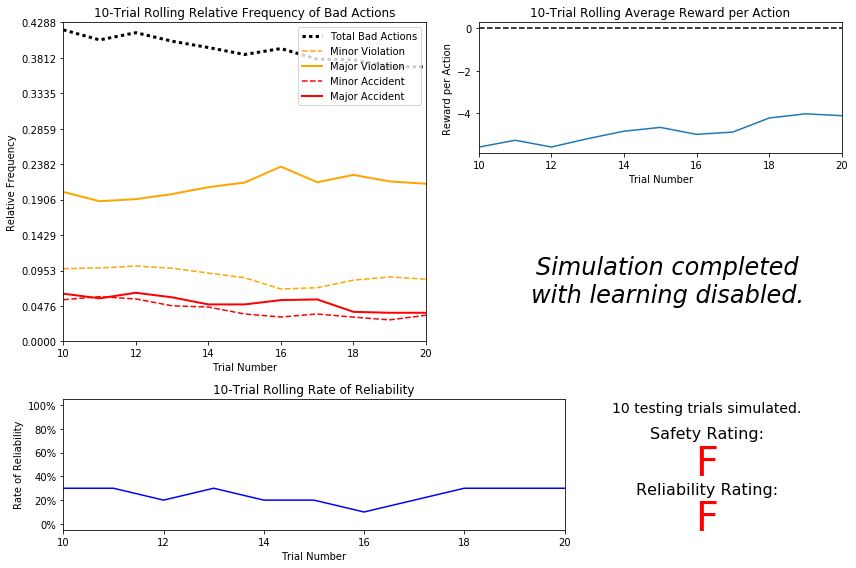

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**  
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*  
The bad decision is about 35-40% and about 25% (0.09 over 0.36) of those bad decsions cause accidents  


- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*  
Yes, the rate of reliabilty is almost zero. With the agent driving randomly, the mean average moving distance to the original starting point is going to be close to zero value.  


- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*  
It receives in average a negative reward between [-5, -6] per action, slightly worse than when the violation = -1 (reward = -5), suggesting it doesn't get penalized in all the actions, and from the frequency plot, it shows that no violation move is about 60%.   
  

- *As the number of trials increases, does the outcome of results change significantly?*  
The outcome of results remains flat as the number of trials increases.  
  
  
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*  
This Smartcab cannot be considered safe or reliable for its passangers, as the reliability rate is close to zero and 40% of the actions made is bad action.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**  
The 'input' and 'waypoint' are the most important and relevent features for both safety and efficiency. The 'input' tells what the road condition of the Smartcab is currently in: the traffic light and also the action taken by the other cars from upcoming/left/right direction, which are the most important features for the safety. 
The 'waypoint' tells about how to move (without considering 'input') to the destination, which is very important to efficiency.   

The light inoformation provides if it is red or green light which is essenital for the smartcab to decide the movement. For example, if the traffic is red, the smartcab cannot make forward or left-turn move based on US traffic laws (probably in all the traffic law worldwide).

In the input, there is also traffic information from "Upcoming", "Left" and "Right". In my model, I decide to take the traffic of "Right" feature out, since right traffic is not needed based on US traffic laws.  
Both the "Upcoming" and "Left" cannot be excluded, for example:  
The smartcab cannot make a left turn if the Upcoming traffic is forward or right turn.  
The smartcab cannot make a right turn if the left traffic is forward.

So the total of features are:  
* waypoint: ['forward', 'left', 'right']
* Light: [Green, Red]
* Upcoming: [None, 'forward', 'left', 'right']  
* Left: [None, 'forward', 'left', 'right']  

  
The 'deadline' is not included in my consideration since based on the penalty system designed in this smartcab project, 'deadline' impacts the reward very minimally. It does have information on the time and is a critical factor on the efficieny but for this project and also in real life, the priority of the safety should always be superior than efficiency.  
And since the initial deadline depends on the distance between the start and final desitnation (randomized in each trials) it can have many different values. If we were to include the deadline into our current state, our state space would blow up, we would suffer from the curse of dimensionality and it would take a long time for the q-matrix to converge. And also including the deadline could possibly influence the agent in making illegal moves when the deadline is near, which resulting in safety issues.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  
The total number of states = 3 x 2 x 4 x 4 = 96  
Given the small number of states and in each trials the agnet will making tens of step (deadline = 5 times of distance), so I think the agent could learn a policy for each possible state within a reasonable number of training trials. 


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

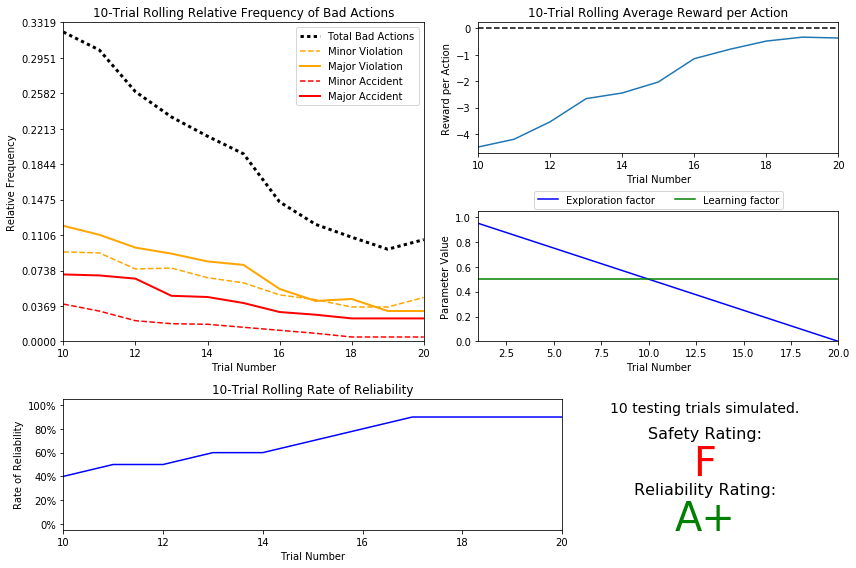

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
Compared to the basic-driving agent, the reliability rating improves from F to A with Safety rating remains as F. Although with the low safety rating, the relative rolling frequency of bad actions (viloation and accident) drastically reduces to 11% (vs. 40% for the basica-driving agent) after 20 trials. The rolling curve of the default Q-lerning agent shows a decreasing trend (flat trend for basic driving agent) which representing the agent is gaining and learning in each training trial and the learning is propogating to the next trial. With the much lower frequency of bad actions, the agent also has a much better rolling average reward (~ -0.5) than the basic-driving agent (~ -4).  
  
  
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*   
After about 20 training trials the driving agnt start the testing, this number matches to the tolerance of 0.05 with the epislon starts at 1 with a decay factor of 0.05.  


- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*  
Yes, it acuurately represented in the parameters panel 


- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*  
Yes, number of bad actions decreases and the average reward increases


- *How does the safety and reliability rating compare to the initial driving agent?*  
The reliabilty rating improves from F to A+, and the safety remains as F, and as stated earlier, both the freqency of the bad actions (violation and accident) becomes much less than the initial driving agnet. 



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

      mean                              
alpha  0.3  0.4  0.5  0.6  0.7  0.8  0.9
decay                                   
0.01   1.0  1.0  1.0  1.0  1.0  0.9  0.9
0.02   0.9  1.0  1.0  0.9  0.8  1.0  1.0
0.03   1.0  1.0  0.7  1.0  0.8  0.7  0.7
0.04   1.0  1.0  0.8  1.0  0.8  0.9  0.7
0.05   1.0  0.9  0.9  0.9  0.7  1.0  1.0


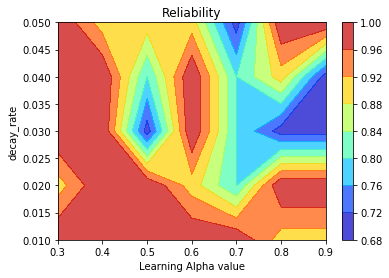

C:\Users\Chou_h\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


      safety rating                        
alpha           0.3 0.4 0.5 0.6 0.7 0.8 0.9
decay                                      
0.05              F   D   F   D   F   F   D
0.04              D   F   F   C   C   D   F
0.03              D   F   C   D   C   F   F
0.02              C   F   A   F   F   F  A+
0.01             A+  A+  A+  A+  A+   A  A+


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

def calculate_safety(data):
	""" Calculates the safety rating of the smartcab during testing. """

	good_ratio = data['good_actions'].sum() * 1.0 / \
	(data['initial_deadline'] - data['final_deadline']).sum()

	if good_ratio == 1: # Perfect driving
		return ("A+")
	else: # Imperfect driving
		if data['actions'].apply(lambda x: ast.literal_eval(x)[4]).sum() > 0: # Major accident
			return ("F")
		elif data['actions'].apply(lambda x: ast.literal_eval(x)[3]).sum() > 0: # Minor accident
			return ("D")
		elif data['actions'].apply(lambda x: ast.literal_eval(x)[2]).sum() > 0: # Major violation
			return ("C")
		else: # Minor violation
			minor = data['actions'].apply(lambda x: ast.literal_eval(x)[1]).sum()
			if minor >= len(data)/2: # Minor violation in at least half of the trials
				return ("B")
			else:
				return ("A")

dataname = r'C:\Users\Chou_h\Documents\machine-learning\projects\smartcab\logs\sim_improved-learning_all.csv'
data = pd.read_csv(dataname)
data
data['actions'][0]
data.columns
data_test = data[data['testing']==True]
data_test['testing'].unique()
data_test.groupby(['decay', 'alpha'])['success'].mean()
reli = data_test.groupby(['decay', 'alpha'])['success'].mean()
relireset = reli.reset_index()
relireset.columns = ['decay', 'alpha', 'mean']


reli_pivot=relireset.pivot('decay', 'alpha')
print reli_pivot
#reli_pivot = reli_pivot[reli_pivot.columns[::-1]]
#print reli_pivot
X=reli_pivot.columns.levels[1].values

Y=reli_pivot.index.values
Z=reli_pivot.values
Xi,Yi = np.meshgrid(X, Y)
cs = plt.contourf(Xi, Yi, Z, alpha=0.7, cmap=plt.cm.jet)
cbar = plt.colorbar(cs)
plt.ylabel('decay_rate')
plt.xlabel('Learning Alpha value')
plt.title('Reliability')
plt.show()

data_test['good_actions'] = data_test['actions'].apply(lambda x: ast.literal_eval(x)[0])
data_test.groupby(['alpha', 'decay']).apply(calculate_safety)
safety= data_test.groupby(['alpha', 'decay']).apply(calculate_safety).reset_index()
safety.columns = ['alpha', 'decay', 'safety rating']
safety_table= safety.pivot('decay', 'alpha').iloc[::-1]
print safety_table

In the code above, I choose a constant decay rate method and I also run a grid search of alpha = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] and a constant decay rate = [0.01, 0.02, 0.03, 0.04, 0.05], and then reported out the reliability and safety rating matrix. It shows that in most cases the reliabity can be very good, approaching 1. For safety to reach A+, it happens more frequenty when the decay rate is small such as 0.02 or 0.01, which means more traininings set are ran to train the Q-model. 

       mean                              
alpha   0.3  0.4  0.5  0.6  0.7  0.8  0.9
decay                                    
-0.100  1.0  1.0  0.9  0.9  1.0  1.0  0.9
-0.075  1.0  1.0  0.7  0.9  1.0  0.9  0.9
-0.050  0.9  1.0  1.0  1.0  1.0  1.0  1.0
-0.025  1.0  1.0  1.0  1.0  0.9  1.0  1.0


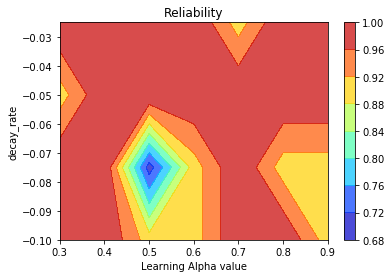

C:\Users\Chou_h\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       safety rating                        
alpha            0.3 0.4 0.5 0.6 0.7 0.8 0.9
decay                                       
-0.025            A+  A+  A+   D  A+   F   C
-0.050            A+   F   D  A+   D   F   F
-0.075             D   C   F  A+   F   F   F
-0.100             F  A+   D   F   F   F   F


In [26]:
dataname = r'C:\Users\Chou_h\Documents\machine-learning\projects\smartcab\logs\sim_improved-learning_all_expdecay.csv'
data = pd.read_csv(dataname)
data
data['actions'][0]
data.columns
data_test = data[data['testing']==True]
data_test['testing'].unique()
data_test.groupby(['decay', 'alpha'])['success'].mean()
reli = data_test.groupby(['decay', 'alpha'])['success'].mean()
relireset = reli.reset_index()
relireset.columns = ['decay', 'alpha', 'mean']


reli_pivot=relireset.pivot('decay', 'alpha')
print reli_pivot
#reli_pivot = reli_pivot[reli_pivot.columns[::-1]]
#print reli_pivot
X=reli_pivot.columns.levels[1].values

Y=reli_pivot.index.values
Z=reli_pivot.values
Xi,Yi = np.meshgrid(X, Y)
cs = plt.contourf(Xi, Yi, Z, alpha=0.7, cmap=plt.cm.jet)
cbar = plt.colorbar(cs)
plt.ylabel('decay_rate')
plt.xlabel('Learning Alpha value')
plt.title('Reliability')
plt.show()

data_test['good_actions'] = data_test['actions'].apply(lambda x: ast.literal_eval(x)[0])
data_test.groupby(['alpha', 'decay']).apply(calculate_safety)
safety= data_test.groupby(['alpha', 'decay']).apply(calculate_safety).reset_index()
safety.columns = ['alpha', 'decay', 'safety rating']
safety_table= safety.pivot('decay', 'alpha').iloc[::-1]
print safety_table

In the code above, I choose a exponential decay rate method where decay rate = exp(beta*t); beta is the exponential decay factor. I also run a grid search of alpha = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] and beta = [-0.025, -0.05, -0.075, -0.1], and then reported out the reliability and safety rating matrix. Similar to the constant decay rate case, it shows that in most cases the reliabity can be very good, approaching 1. And for safety to reach A+, it happens more frequenty when the beta is less negative such as -0.025 or -0.05; so the decay rate is small, which means more traininings set are ran to train the Q-model. 

In the final case below, I chose alpha = -0.04 and beta = -0.0375 for the exponential decay factor.

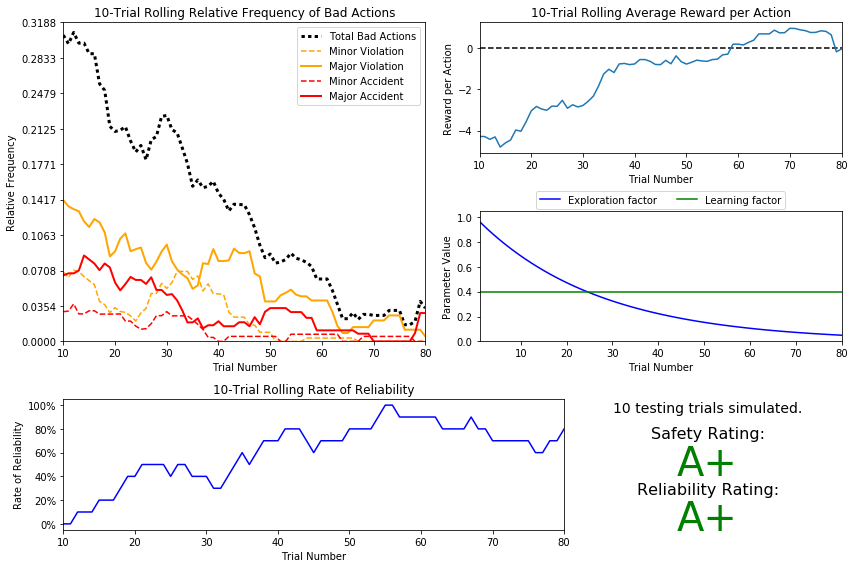

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*   
I chose exponetial decay function for epislon (the exploration factor).
- *Approximately how many training trials were needed for your agent before begining testing?*  
About 80 trials were needed before the agent begining to test.
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*  
    I chose aplha = 0.4, this is based on the previous 2D grid search of alpha and epsilon, which provides the highest reliability and safety score.  
    For epsilon-tolreance, I sticked to the default 0.05 value. Based from the figures of the results above, it does show this is close to the ideal value where when the trial runs stopped at 80 runs, the violtaions/accidents drop to very low value and also the reward/action starts to flatten out.
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*  
The major improvement is on the safety side, the score improves to A+ from F.
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*    
Yes, the driving agent learned an appropriate policy that achieve A+ score in both safety and reliablity rating.
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*  
Yes, the rating of A+ show the smartcab can reach the destination everytime safely with the learned policy.

**Answer:**  
The decaying function I used for epsilon is an exponetial decaying function. The decay factor is exp(-0.0375) ~= 0.963, and the epsilon-tolerance is the default value: 0.05, which results in 80 training trials before the tolerance is reached and the agent begins to test. 
I chose alpha = 0.4 for the learning rate. The 0.4 learning rate in my Q-learning algorithm represents the state in the Q-learning state table is updated with 60% for the current state value + 40% of the reward from the action taken: Q[state][action] = (1-alpha)*Q[state][action] + aplha** reward   


For both the value of alpha and decay factor, they are chosen from the optimum point for the highest reliability and safety score from the previous 2D grid search of alpha and epsilon. For epsilon-tolreance, I sticked to the default 0.05 value. Based on the figure of 10-trial Rolling Relative Frequency of Bad Actions from the results above, it does show this is close to the ideal value where when the trial runs are close to 80 runs, the violtaions/accidents drop to very low value and also the reward/action starts to flatten out.  
For the improved Q-learner, the major improvement is on the safety side when compared to the default Q-learner, the score improves from F to A+. 
I am satisfied with the safety and reliability of the Smartcab. With the achived A+ score in both safety and reliability rating, the driving agnet has suffcessfuly learned an appropriate policy to reach the desitnation safely. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:**  
The Optimum Policy for the three waypoint options are:  
    * waypoint forward:
        * move forward if the traffic light is green.
        * otherwise (traffic light is red) just wait.
    * waypoint left:
        * turn left if the traffic light is green, and the oncoming traffic is neither moving forward nor moving right.
        * wait if the traffic light is red.
        * otherwise move forward
    * waypoint right:
        * turn right when the traffic light is green
        * turn right also when the traffic light is red but no car is coming from the left.
        * wait if the traffic light is red and there is a car coming from the left side.   
        
Most states in my trained policy follows the optimum policy:  

For example: 
('forward', 'red', None, 'left')
 -- forward : -7.32
 -- right : 0.51
 -- None : 1.15
 -- left : -24.34  
 In the state above, the waypoint is forward when the traffic is red, and agent will choose to wait (None = 0.36 with the highest reward)

Another example:
('forward', 'green', 'left', 'right')
 -- forward : 1.01
 -- right : 0.00
 -- None : 0.64
 -- left : 0.00  
 In the state above, the waypoint is forward when the traffic is green, and the agent will move forward based on the highest reward, which is the Optimum policy. 

There are rare cases which the optimum policy is not followed, such as:  
('right', 'green', 'left', 'left')
 -- forward : 0.59
 -- right : 0.00
 -- None : 0.06
 -- left : 0.13  
In the state above, when the waypoint is right and the traffic light is green. The optimum policy is to move right, but based in my policy it would choose moving forward based on the highest reward, which is still a valid move under the U.S. right-of-way traffic laws. The "right" has a reward of zero, suggesting this move might not really been explored in the trial run, therefore the reward for taking this action is not explored and learned.   
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
* For the Smartcab agent: The smartcab agent's goal is to make the safe and correct move toward the destination at each step, and the agent has only the current state's information (waypoint, traffic light, traffic) to make the decision but doesn't have the information about the future state. So at each step/intersections, the agent's decision is made based on the current states (waypoint, traffic light, traffic) and is independent of other steps. Feeding the abudant information of the reward from the future states is unnecessary.    
  
    
* For the environment: the environment of each run is indepedent from each other (trandomization of starting/end point for the learning agent, the location of the dummy agents and the traffic light starting condition and how often it switches between green and red at each intersection). So even if at one environment (one trial) the future state's information is transferred to the current state, that learned information is not useful to a different enviroment (either another trial run or a test run) since eahc enviroment is really generated randomly.    
    

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.